### Alumno: Martiño Crespo Álvarez

In [ ]:
import sys

# Instala tanto el paquete mdatos como sus dependencias
!{sys.executable} -m pip install -e ..
!{sys.executable} -m pip install -r ../requirements.txt

## Notas previas

Los conceptos, términos  e implementaciones presentados en este guion han sido adquiridos consultando [1], [2] y [3].

---

Los entornos y algoritmos utilizados en el presente paquete son los siguientes, de menor a mayor complejidad:


Entorno | Sarsa | Q-Learning | n-step Sarsa | Dyna-Q 
--- | --- | --- | --- | ---
[NChain-v0](https://gym.openai.com/envs/NChain-v0/)| Sí | Sí | Sí | Sí |
[FrozenLake-v0](https://gym.openai.com/envs/FrozenLake-v0/)| Sí | Sí | Sí | Sí |
[CartPole-v0](https://gym.openai.com/envs/CartPole-v0/)| Sí | Sí | Sí | No |
[MountainCar-v0](https://gym.openai.com/envs/MountainCar-v0/)| Sí | Sí | Sí | No |

---

Al final del guion, en el apartado [Comparaciones](http://localhost:8888/notebooks/guion/guion.ipynb#Comparaciones), se comparan los resultados obtenidos por diferentes algoritmos para el mismo entorno. Sin embargo, la presente guía no tiene como objetivo presentar y comentar el código de todos y cada uno de los casos. Como se indica en el `README.md` del paquete, los algoritmos pueden consultarse en `mdatos/algos` y la aplicación de los algoritmos para cada entorno, en `mdatos/envs`.

---

Por algún motivo que se desconoce, las barras de progreso utilizadas para entrenar a los agentes no se actualizan como es debido. A pesar de ello, el resto del código se ejecuta correctamente, aunque tarda cierto tiempo en finalizar (alrededor de 1 o 2 minutos como máximo).

# **Reinforcement Learning**

## **Conceptos básicos**

El aprendizaje por refuerzo, comúnmente referido como *Reinforcement Learning* (RL), es uno de los tres pilares del *Machine Learning* (ML) junto con el *supervised* y *unsupervised learning*, y tiene como objetivo optimizar mediante el aprendizaje la secuencia de decisiones que un agente debe realizar en un entorno para obtener la máxima recompensa acumulada a lo largo del tiempo.

Los elementos principales del RL, sus interacciones y el proceso de aprendizaje se presentan en la siguiente figura:

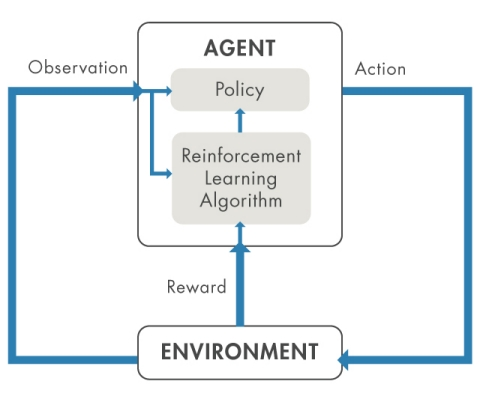

Un problema de RL cuenta, al menos, con los siguientes elementos:

1.   Agente o *agent*: Entidad capaz de medir determinadas magnitudes del entorno y de actuar sobre él. Es la parte más interesante del problema en cuanto a resultados finales se refiere, y la que realizará el aprendizaje. Internamente, el agente está compuesto por:

  *   Política o *policy*: Es la manera específica que tiene el agente de reaccionar dependiendo de su estado dentro del entorno, es decir, qué acción escogerá realizar para una observación del entorno dada. Aprender una política óptima es el objetivo de un problema de RL.
  *   Algoritmo de RL: Mediante la interacción con el entorno y los datos recopilados a través de ese proceso, la política mejorará con el tiempo. Cómo gestionar esos datos para obtener resultados mejores dependerá del algoritmo utilizado.

2.   Entorno o *environment*: Es el conjunto de reglas en las que el agente se desenvuelve y determinan su dinámica. Dichas reglas pueden ser físicas, como la gravedad o el electromagnetismo de un mundo real o simulado; pero también pueden ser abstractas, como las reglas financieras y económicas cuando se trata de un agente que compra y vende acciones en bolsa.

3.   Acción o *action*: Forma que tiene el agente de interaccionar con el entorno y alterar su dinámica natural.

4.   Recompensa o *reward*: La recompensa es un valor numérico que el agente recibe al estar en un determinado estado y realizar una determinada acción.

5.   Observación u *observation*: Es la descripción en un momento dado del entorno en el que el agente se encuentra.


### Ejemplos

Para ilustrar y comprender mejor lo descrito en el apartado anterior, a continuación se enumeran una serie de ejemplos sobre posibles problemas o aplicaciones de Reinforcement Learning:

*   Un robot aspirador (agente) decide su dirección de movimiento (acción) dentro de una habitación (entorno) de la que tiene que aspirar toda su superficie en el menor tiempo posible (recompensa), dada su posición en ella (observación).
*   Un coche autónomo (agente) decide si acelerar, frenar o girar (acción) en una carretera (entorno) para llevar a sus pasajeros al destino seleccionado de una forma segura (recompensa), dadas su posición, velocidad y la de otros elementos posibles detectados en la carretera (observación).
*   Un software (agente) que juega al ajedrez (entorno) decide qué pieza mover y cómo (acción) para poder ganar (recompensa), basándose en la distribución de piezas en el tablero (observación).
*   Un alumno de la UNED (agente) cursando la asignatura de Minería de Datos, que cuenta con unas determinadas reglas de evaluación (entorno), tiene que hacer progresos en su proyecto (acción) para obtener la máxima nota posible (recompensa), basándose en el estado de dicho proyecto (observación).


## Métodos de Monte Carlo

El término “Monte Carlo” es generalmente usado para describir un método de estimación cuyas operaciones tienen en cuenta componentes aleatorias.
En lo que respecta al Reinforcement Learning, los métodos de Monte Carlo son un conjunto de enfoques para resolver los problemas presentados. Es uno de los primeros métodos desarrollados y posiblemente el más sencillo, aunque en muchas ocasiones también el más robusto y efectivo.

Antes de explicar en qué consisten, es necesario introducir los conceptos de *episodio* y *valor*: 
*     Un *episodio* es un conjunto de interacciones entre el agente y su entorno, es decir, un conjunto de secuencias formadas por una acción, una observación y una recompensa. Existen problemas en los que los episodios son finitos (por ejemplo, un nivel de *Super Mario Bross* comienza siempre en el inicio y acaba cuando Mario muere o llega al final) o infinitos (como un agente de bolsa, ya que teóricamente su tiempo de ejecución tiende al infinito).
*     El *valor* de un estado u observación es un valor numérico relacionado con la predicción de la recompensa total acumulada que un agente obtendrá desde el momento en que se encuentra en dicho estado. Es decir, es una indicación de cuán conveniente es para el agente encontrarse en dicho estado. En muchas ocasiones, resolver el problema de RL significa calcular u obtener el *valor óptimo* de cada estado, ya que bastaría con elegir los estados con un mayor valor para así obtener una mayor recompensa.

Los métodos de Monte Carlo resuelven el problema de RL calculando la media de las recompensas obtenidas para cada par acción-estado. Para ello, el agente interacciona con el entorno y va guardando el estado, acción y recompensa obtenida a lo largo de él. Es importante destacar que dichos valores dependen de la política adoptada por el agente. Una vez finalizado cada episodio, se procede a la actualización de los valores de cada estado, para dicha política. Es posible demostrar que estos valores convergen al valor real dado un número suficiente de episodios. Posteriormente, se ajusta la política para que elija el estado con mayor valor, y se genera otro episodio.
Este ciclo se repite muchas veces hasta obtener los valores óptimos de cada estado, y como consecuencia, la política óptima que el agente utilizará para obtener la mayor recompensa posible. Este proceso se resume en el siguiente gráfico [2]:

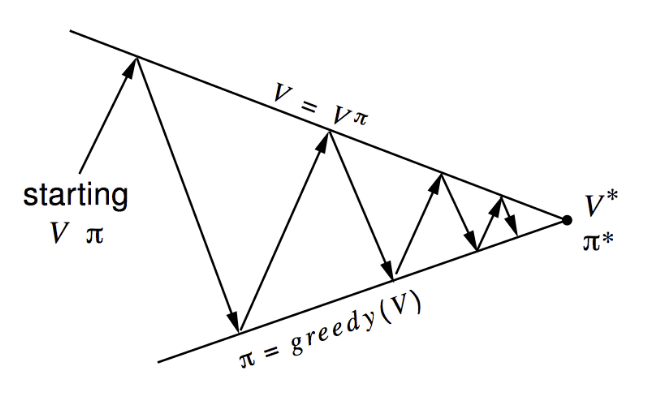


Uno de los algoritmos más sencillos que plasman la imagen anterior es el denominado *Monte Carlo ES (Exploring Starts)* [1]:

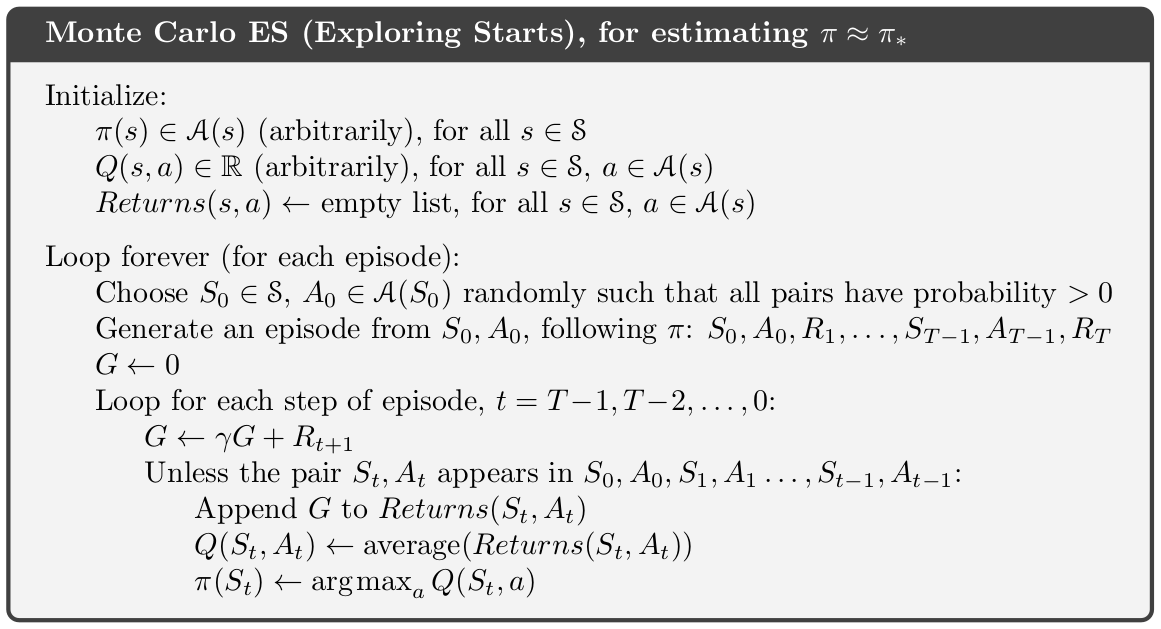

## TD Learning

Los métodos de Monte Carlo aprenden sobre el resultado de sus acciones tan solo una vez el episodio finaliza. Podría pensarse que el hecho de no aprender durante la duración de cada episodio hace que este tipo de métodos sean poco eficientes.
Es precisamente eso lo que proponen los métodos denominados *Temporal Difference Learning* o simplemente *TD Learning*. A diferencia de los métodos Monte Carlo, los métodos TD Learning ajustan su política cada vez que el agente realiza una acción en un estado determinado, pasa a un nuevo estado y recibe una recompensa específica por ello.
Esto generalmente se traduce en una mayor velocidad de aprendizaje, aunque ante ciertas condiciones también puede derivar en una no convergencia de los valores de los estados.

En este apartado, se ilustrarán dos algoritmos TD Learning como son *Sarsa* y *Q-Learning*.
Junto con ellos, a pesar de no estar limitados al TD Learning, se introducen los conceptos de *Off-Policy* y *On-Policy Learning*.

### On-Policy Learning

En realidad, un agente no sólo cuenta con una única política, si no que puede tener dos: una *behaviour policy*, a partir de la cual se mueve en el entorno y decide cómo actuar; y una *target policy*, que será la que se modifique y mejore con la experiencia recolectada por la anterior.

Este es el caso del *Off-policy Learning*. La aplicación más representativa de este tipo de aprendizaje es el llamado *imitation learning*, donde la *behaviour policy* es la política que se intenta imitar, mientras que la *target policy* es aquella política que se modifica para poder imitar a la anterior.

Un ejemplo de esta aplicación podría ser un brazo robótico controlado por un ser humano y que tiene como objetivo abrir una puerta utilizando el cerrojo (*behaviour policy*). Tras demostrar una serie de ejemplos, el brazo deja de ser controlado por el ser humano, y el agente de RL (*target policy*) comienza su aprendizaje e intenta realizar lo mismo que o imitar a la *behaviour policy*, a partir de los ejemplos realizados previamente.

En el caso del *On-policy Learning*, el agente tiene la misma *behaviour* y *target policy*, como es el caso del **Sarsa**.

### Sarsa

Antes de continuar, es necesario explicar que tanto Sarsa como Q-Learning utilizan los denominados *Q-values* o *valores Q*. A diferencia del valor de un estado, es decir, un valor que aproxima la recompensa futura que obtendrá el agente a partir del momento en el que se encuentra en dicho estado, los Q-values indican la recompensa futura tras encontrarse en un estado determinado *y* realizar una acción determinada. 

A continuación, se muestra el pseudocódigo de Sarsa [1]:

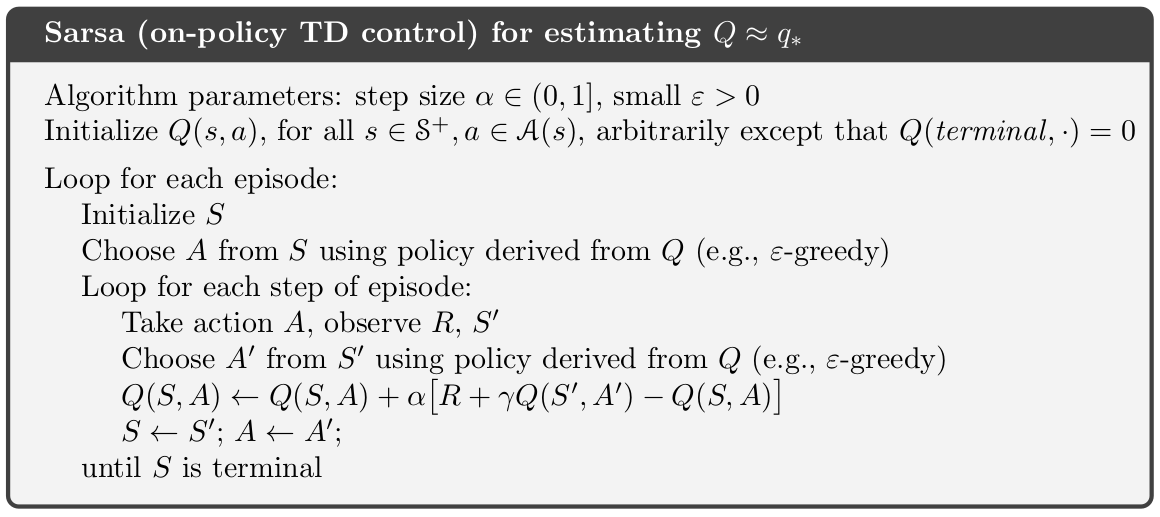



Para comenzar a entrenar un agente de RL mediante Sarsa, lo primero es importar los paquetes necesarios, tanto externos como internos.

In [ ]:
import gym

from mdatos.algos.sarsa import Sarsa
from mdatos.utils.misc import TrainingProgressBarManager

También es necesario configurar el nivel del sistema de `logging` para poder visualizar los `logs` de cada algoritmo. 

In [ ]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

Posteriormente, se definen los hiperparámetros a utilizar.

In [ ]:
DISCOUNT_RATE = 0.99
EPISODES_TO_TRAIN = 1000
EPSILON = 1.0
EPSILON_RATE = 0.99999
LEARNING_RATE = 0.1
TERMINAL_STATES = ()

EPISODES_TO_RUN = 1

A continuación, se crea el objeto Sarsa y se entrena.

In [ ]:
from tqdm.notebook import tqdm

hyperparameters = {
    "discount_rate": DISCOUNT_RATE,
    "episodes": EPISODES_TO_TRAIN,
    "epsilon": EPSILON,
    "epsilon_rate": EPSILON_RATE,
    "learning_rate": LEARNING_RATE,
    "terminal_states": TERMINAL_STATES,
}
sarsa = Sarsa(gym.make("NChain-v0", slip=0), hyperparameters)
with TrainingProgressBarManager(EPISODES_TO_TRAIN) as tpb:
    sarsa.train(tpb)

Es posible ver los resultados del entrenamiento, aunque se recomienda utilizar el siguiente comando desde una terminal, ya que parece que no funciona como es debido en Jupyter Notebook:

```
tensorboard --logdir mdatos/data/logs/NChain-v0/Sarsa
```

También es posible probar el agente recién entrenado.

In [ ]:
sarsa.run_agent(EPISODES_TO_RUN)

Como puede observarse, el agente consigue de media casi la mayor recompensa posible: 10. Es decir, como está descrito en la documentación del entorno, se sitúa en el extremo derecho de la cadena e intenta ir hacia delante.

### Off-Policy Learning

**Q-Learning** es el algoritmo que se ha implementado en el caso del *Off-Policy Learning*. La siguiente imagen contiene el pseudocódigo de Q-Learning:

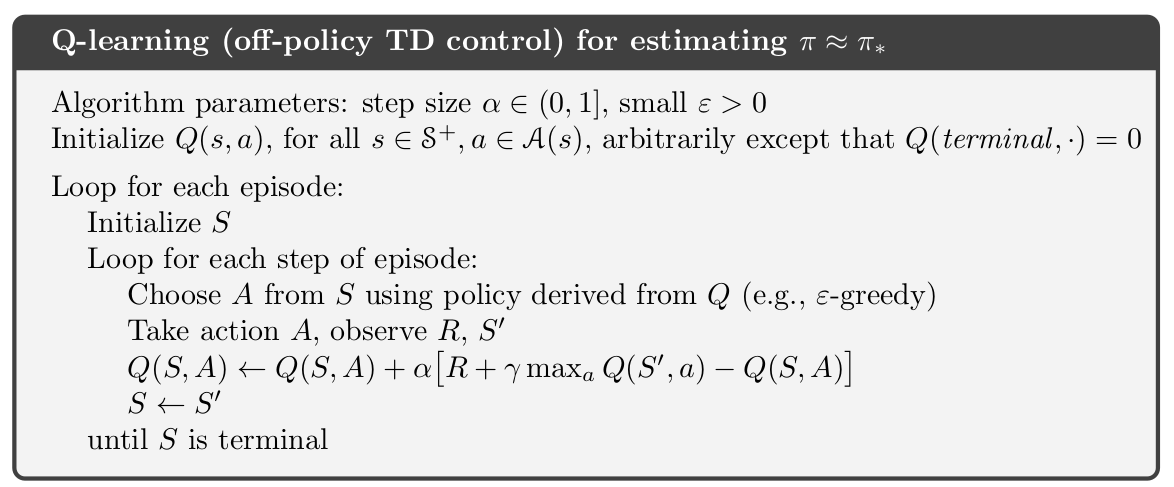

A diferencia de Sarsa, la política para actualizar los Q-values (coger el máximo de los valores) no es la misma que la polítca que genera el comportamiento, de ahí que Q-Learning sea un algoritmo *Off-Policy*.

### Q-Learning

En este apartado, se utilizará el algoritmo de Q-Learning para entrenar un agente de RL en el entorno de `CartPole-v0`.

In [ ]:
from mdatos.algos.q_learning import QLearning

Es importante destacar que todos los algoritmos aquí presentados son tabulares. Por lo tanto, entornos continuos como `CartPole-v0` o `MountainCar-v0` requerirían de una tabla con un número infinito de entradas.

Por ello, se procede a discretizar los estados de estos entornos. Específicamente, para cada observación que el entorno proporciona, se escoge un número finito de valores predefinidos en los que convertirir o discretizar la variable continua en cuestión. 

Para explicarlo mejor, sería como situar cierto número de cubos y acotarlos en un intervalo específico a lo largo de un eje real, que sería la observación. Discretizar dicha variable consiste en determinar en cuál de los cubos debería guardarse esa observación en concreto.

Así, en el ejemplo a continuación, se tiene:

```
BUCKETS = (3, 3, 6, 6)
LOWER_BOUNDS = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
UPPER_BOUNDS = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
```

Si se consulta la [documentación del entorno](https://github.com/openai/gym/wiki/CartPole-v0), esto quiere decir:

*    La posición del carrito se discretiza en 3 valores, acotados en `[-2.4, 2.4]`
*    La velocidad del carrito se discretiza en 3 valores, acotados en `[-0.5, 0.5]`
*    El ángulo que forma el poste con la línea horizontal se discretiza en 6 valores, acotados en `[-41.8, 41.8]`
*    La velocidad del poste en su extremo se discretiza en 6 valores, acotados en `[-0.8726, 0.8726]`

In [ ]:
import math

DISCOUNT_RATE = 1.0
EPISODES_TO_TRAIN = 10000
EPSILON = 1.0
EPSILON_RATE = 0.99999
LEARNING_RATE = 0.1

# parameters for discretizing the state
env = gym.make("CartPole-v0")
BUCKETS = (3, 3, 6, 6)
LOWER_BOUNDS = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
UPPER_BOUNDS = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]

EPISODES_TO_RUN = 1

hyperparameters = {
    "discount_rate": DISCOUNT_RATE,
    "episodes": EPISODES_TO_TRAIN,
    "epsilon": EPSILON,
    "epsilon_rate": EPSILON_RATE,
    "learning_rate": LEARNING_RATE,
    "buckets": BUCKETS,
    "lower_bounds": LOWER_BOUNDS,
    "upper_bounds": UPPER_BOUNDS,
}
q_learning = QLearning(gym.make("CartPole-v0"), hyperparameters, discrete=True)

In [ ]:
with TrainingProgressBarManager(EPISODES_TO_TRAIN) as tpb:
    q_learning.train(tpb)

In [ ]:
q_learning.run_agent(episodes=EPISODES_TO_RUN)
q_learning.env.close()

## Métodos intermedios

Los dos algoritmos presentados hasta ahora ejecutan un aprendizaje totalmente diferente en cuanto a cuándo realizarlo.
Mientras que los métodos Monte Carlo almacenan la experiencia de las interacciones entre agente y entorno a lo largo de un episodio para posteriormente actualizar su política, los métodos TD Learning actualizan su política nada más realizar una interacción entre agente y entorno.
Los métodos *n-step Bootstraping* son el punto intermedio en el espectro generado por los anteriores métodos comentados. Es decir, ni esperan hasta el final del episodio para actualizar su política ni tampoco lo hacen nada más obtener experiencia de una única interacción o paso, si no que lo realizan tras un número determinado de pasos, de ahí su nombre.
Esto puede incrementar significativamente el proceso de aprendizaje. Considérese el siguiente ejemplo, donde un agente puede moverse en un mundo 2D y recibe una recompensa únicamente al llegar a un punto específico [1]:

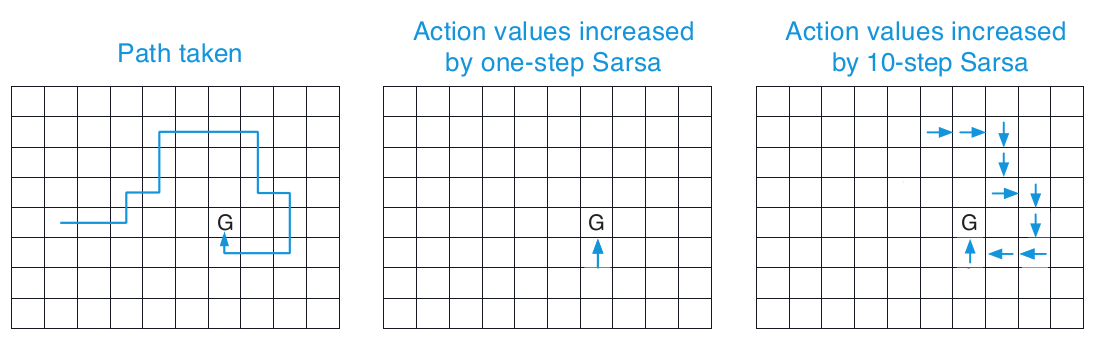

Como se ilustra en la imagen central, el único Q-value que cambia ante la trayectoria seguida es en la celda inmediatamente anterior al punto final, ya que es en ese punto donde recibe su única recompensa. 
Sin embargo, en el caso de utilizar un algoritmo *n-step Bootstraping* como *n-step Sarsa* con `n = 10`, para el mismo episodio los Q-values que cambian son los de los 10 estados inmediatamente anteriores al punto final en la trayectoria. Este mismo resultado sólo podría conseguirse con un algoritmo TD Learning ejecutando muchos más que un único episodio.

Para obtener el valor óptimo de `n`, se simulan los resultados variando dicho parámetro, y así obtener algo similar a la siguiente gráfica, donde puede apreciarse que los valores óptimos son para `n = 4` y `alpha ~ 0.38`:

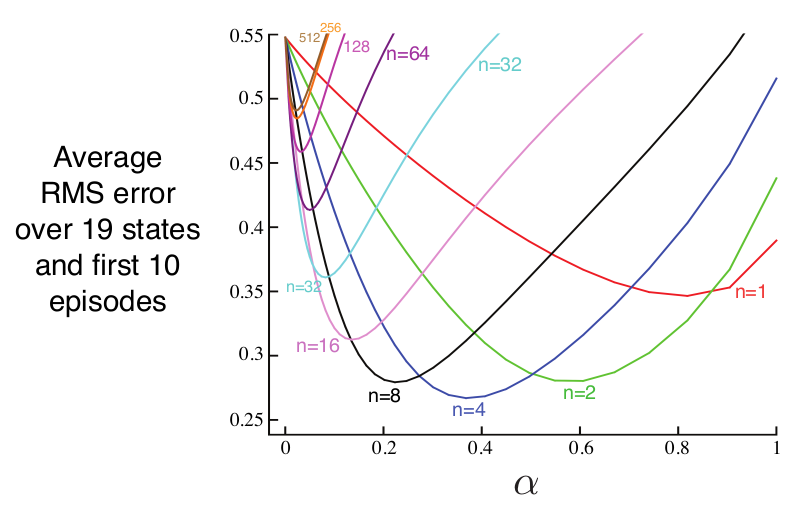

### n-step Sarsa

En este apartado, se utilizará n-step Sarsa para el entorno de `MountainCar-v0`.
El entorno es discretizado como se ha comentado anteriormente, de forma similar a `Cartpole-v0`.

El pseudocódigo de este algoritmo se muestra a continuación [1]:

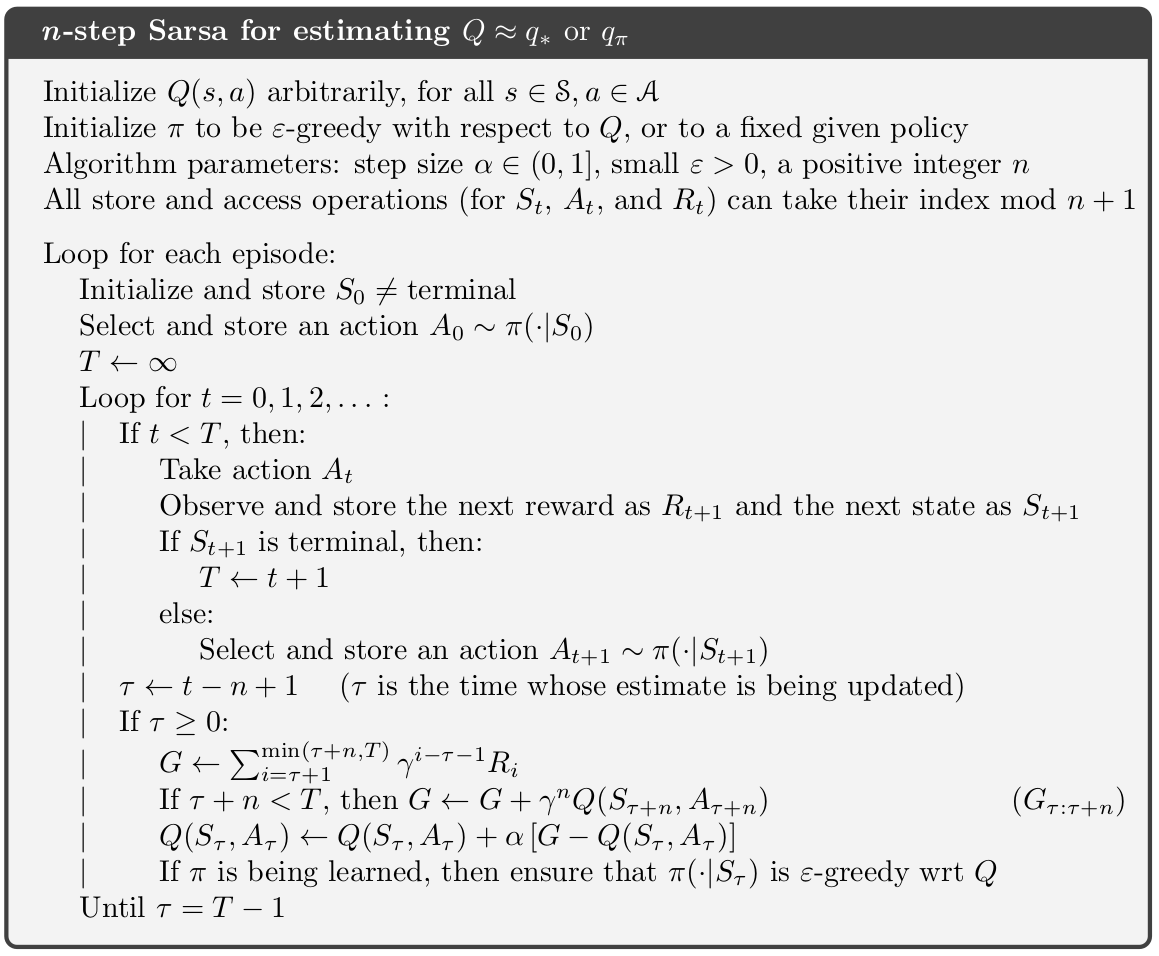

In [ ]:
from mdatos.algos.n_step_sarsa import NStepSarsa

DISCOUNT_RATE = 1.0
EPISODES_TO_TRAIN = 10000
EPSILON = 1.0
EPSILON_RATE = 0.9999
LEARNING_RATE = 0.01
N_STEPS = 5

# parameters for discretizing the state
env = gym.make("MountainCar-v0")
BUCKETS = (20, 20)
LOWER_BOUNDS = [env.observation_space.low[0], env.observation_space.low[1]]
UPPER_BOUNDS = [env.observation_space.high[0], env.observation_space.high[1]]

EPISODES_TO_RUN = 1

hyperparameters = {
    "n": N_STEPS,
    "discount_rate": DISCOUNT_RATE,
    "episodes": EPISODES_TO_TRAIN,
    "epsilon": EPSILON,
    "epsilon_rate": EPSILON_RATE,
    "learning_rate": LEARNING_RATE,
    "buckets": BUCKETS,
    "lower_bounds": LOWER_BOUNDS,
    "upper_bounds": UPPER_BOUNDS,
}
n_steps_sarsa = NStepSarsa(gym.make("MountainCar-v0"), hyperparameters, discrete=True)

Se procede a entrenar y testear el agente.

In [ ]:
with TrainingProgressBarManager(EPISODES_TO_TRAIN) as tpb:
    n_steps_sarsa.train(tpb)

In [ ]:
n_steps_sarsa.run_agent(EPISODES_TO_RUN)
n_steps_sarsa.env.close()

## RL basado en modelos

Hasta ahora, se han estudiado algoritmos del denominado *model-free RL*, y en esta sección se pasará a explicar el caso contrario, es decir, el *model-based RL*.

A diferencia de otros métodos de optimización de decisiones como el *Dynamic Programming (DP)*, el *model-free RL* no utiliza un modelo del entorno en el aprendizaje. 

El modelo de un entorno es básicamente una función que puede ser tan sencilla como una tabla o tan compleja como una red neuronal, y que predice cuál será el siguiente estado de un agente y la recompensa que obtendrá, dados su estado y acción actuales. El grado de precisión o cuán fiel es al entorno real que representa mejora con la experiencia, de forma similar a la actuación del agente. Una vez el modelo está disponible, puede usarse para mejorar la política del agente. 

En el siguiente gráfico [1], pueden observarse los distintos lazos del proceso de aprendizaje para *model-free RL* y *model-based RL*. En el primer caso, el lazo sería `value/policy - acting - experience - direct RL`, mientras que para el segundo caso el lazo incluiría el uso del modelo y sería `value/policy - acting - experience - model learning - model - planning`:

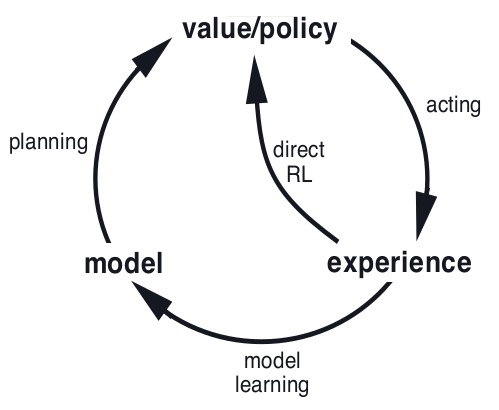

Explicado de forma más intuitiva y poniendo como agente a un ser humano, el *model-free RL* sería como mejorar la pronunciación en inglés utilizando activamente todo el aparato fonador, mientras que el *model-based RL* también pronunciaría las palabras en alto, pero a mayores, en sus ratos libres o cuando no cuenta con la ayuda de su profesor, se quedaría callado y mentalmente ejercitaría dicha pronunciación.

### Dyna-Q

En esta sección, se utilizará Dyna-Q, un algoritmo de RL basado en modelo, para el entorno de `FrozenLake-v0`.

El siguiente es el pseudocódigo de Dyna-Q:

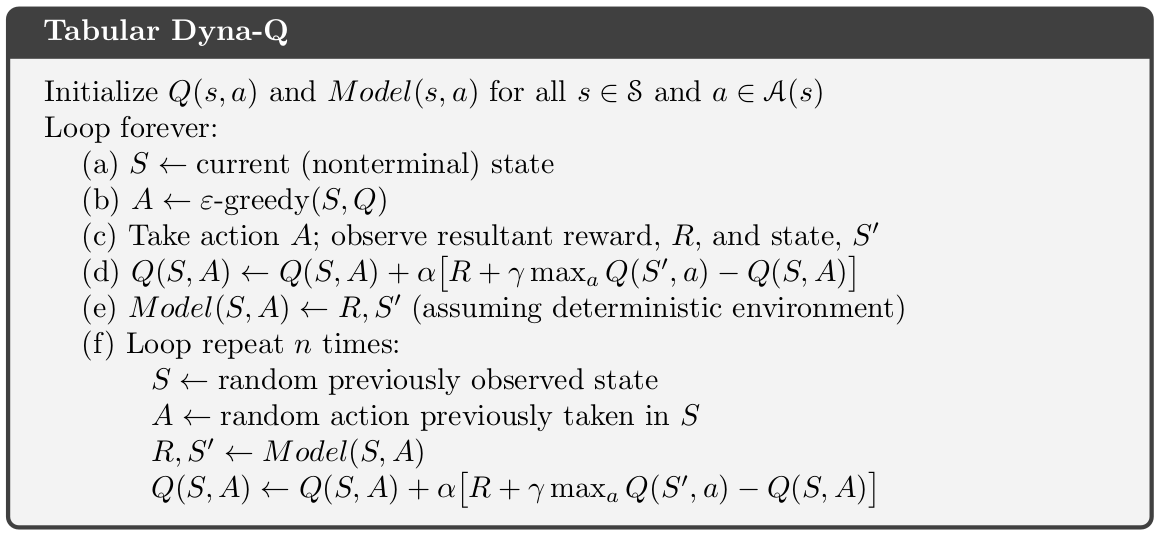

In [ ]:
from mdatos.algos.dyna_q import DynaQ

DISCOUNT_RATE = 0.99
EPISODES_TO_TRAIN = 2000
EPSILON = 0.1
EPSILON_RATE = 0.999
LEARNING_RATE = 0.9
NO_PLANNING_STEPS = 20
TERMINAL_STATES = (5, 7, 11, 12, 15)

EPISODES_TO_RUN = 1

hyperparameters = {
    "discount_rate": DISCOUNT_RATE,
    "episodes": EPISODES_TO_TRAIN,
    "epsilon": EPSILON,
    "epsilon_rate": EPSILON_RATE,
    "learning_rate": LEARNING_RATE,
    "terminal_states": TERMINAL_STATES,
    "no_planning_steps": NO_PLANNING_STEPS,
}
dyna_q = DynaQ(gym.make("FrozenLake-v0", is_slippery=False), hyperparameters)

De nuevo, se procede a entrenar y testear el agente:

In [ ]:
with TrainingProgressBarManager(EPISODES_TO_TRAIN) as tpb:
    dyna_q.train(tpb)

In [ ]:
dyna_q.run_agent(EPISODES_TO_RUN)

Se puede observar cómo el agente realiza el camino más corto entre su posición inicial y final mientras esquiva los obstáculos en el camino.

## Comparaciones

En este apartado, se comparan y comentan los procesos de entrenamiento para los distintos agentes en cada uno de los entornos disponibles utilizando las gráficas generadas por `tensorboard`. Cabe destacar que las gráficas han sido obtenidas para un conjunto particular de hiperparámetros, los cuales se han escogido para obtener las mejores curvas posibles.

Para cada ejemplo, se generan dos gráficas:

1.    `mean_episode_reward`: recompensa media en cada paso dado por el agente.
2.    `total_episode_reward`: recompensa media acumulada en todos los pasos dados por el agente a lo largo de los episodios.

#### NChain-v0

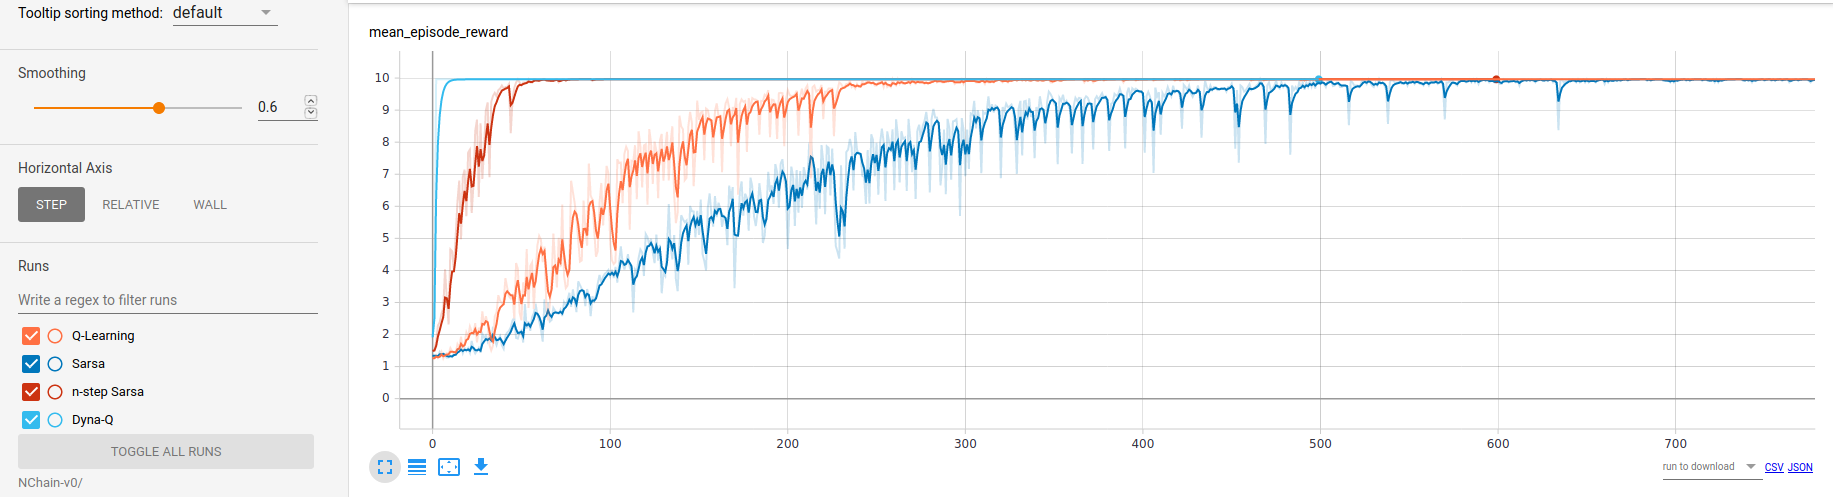

#### FrozenLake-v0

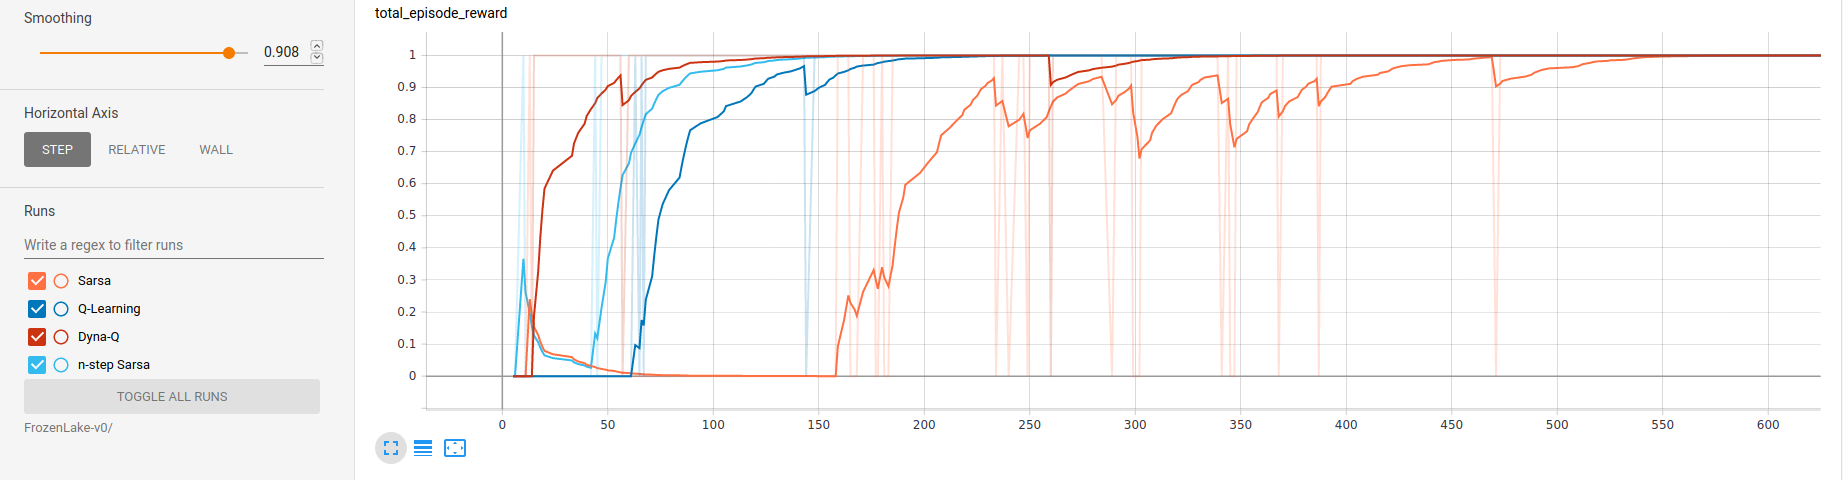

Tanto `NChain-v0` como `FrozenLake-v0` son entornos similares al ejemplo puesto en [Métodos intermedios](http://localhost:8888/notebooks/guion/guion.ipynb#M%C3%A9todos-intermedios), ya que se trata de simulaciones de mundos 2D con espacios discretos. Por lo tanto, puede observarse cómo las mejoras introducidas en `Dyna-Q` y en `n-step Sarsa` dan buenos resultados y su aprendizaje es más rápido que `Q-Learning` o `Sarsa`.

#### Cartpole-v0

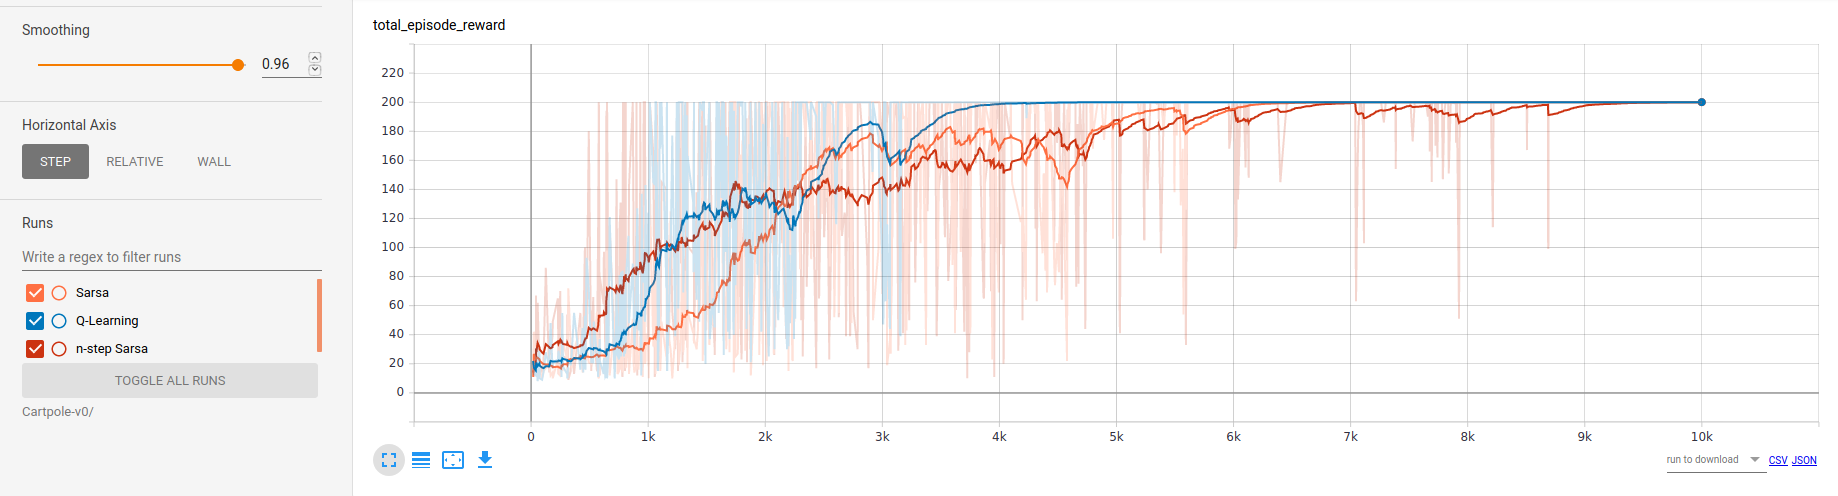

#### MountainCar-v0

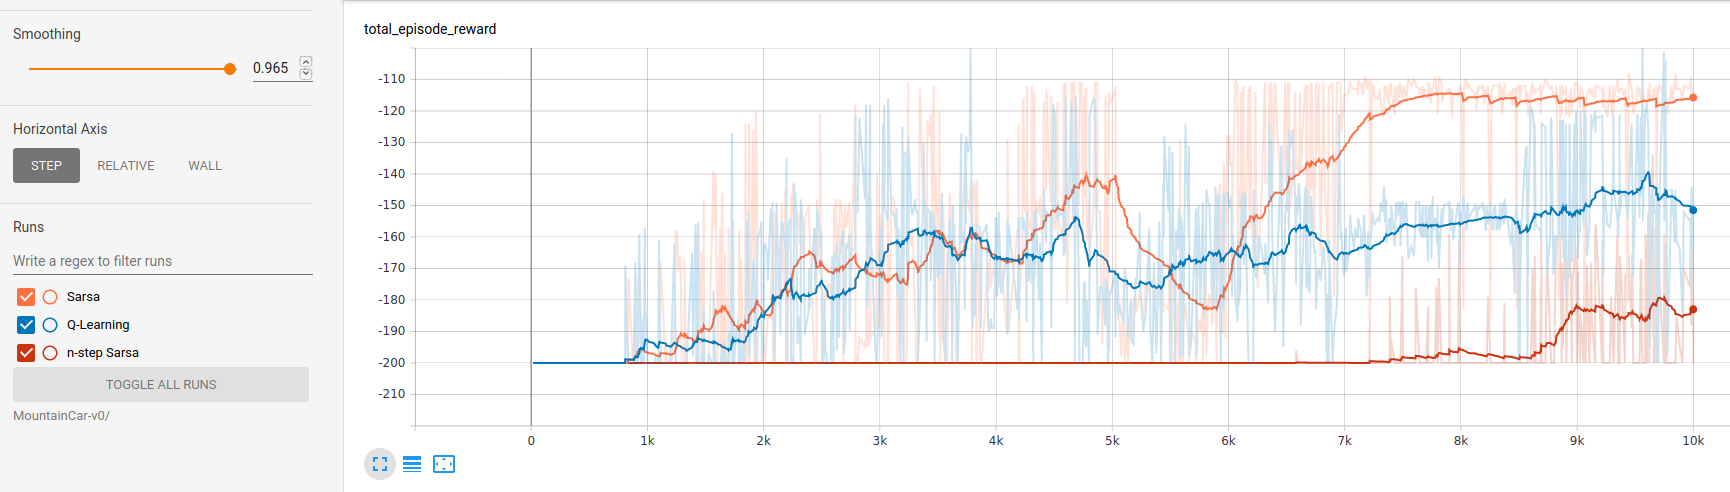

Lo más destacable de las gráficas de `Cartpole-v0` y de `MountainCar-v0` es que las mejoras introducidas en `n-step Sarsa` no funcionan tan bien en entornos más complejos.

## Conclusión

A lo largo de esta guía, se han tratado diferentes conceptos sobre el *Reinforcement Learning*, se ha mostrado parte del código que implementa dichos conceptos, y se han mostrado y debatido sus resultados.

De forma resumida, se han presentado los siguientes conceptos sobre RL:

*    Elementos básicos: agente, entorno, acción, recompensa y observación.
*    Métodos de Monte Carlo: generan un episodio para después aprender de los resultados obtenidos.
*    Métodos de TD Learning: actualizan su política inmediatamente después de interaccionar con el entorno, sin esperar a que el episodio finalice.
*    *Off-* y *On-Policy Learning*: esta diferenciación determina si un agente utiliza o no la misma política para interaccionar con el entorno y aprender de lo experimentado. 
*    Métodos n-step Bootstraping: es un punto intermedio de los dos métodos anteriores y realiza *n* pasos o interacciones entre el agente y el entorno, para aprender de la experiencia durante esos *n* pasos.
*    *Model-based* y *model-free RL*: la diferencia entre ambos radica en la utilización o no de un modelo del entorno, es decir, una predicción del siguiente estado y recompensa a partir del estado y acción actuales.

Por último, comentar que el *Reinforcement Learning* es uno de los campos de la Inteligencia Artificial con mayor potencial para revolucionar gran cantidad de disciplinas en el futuro. Su flexibilidad intrínseca entre problemas de diversa índole, junto con avances científicos, matemáticos y computacionales han permitido que en los últimos años se hayan podido ver hitos tan importantes como la [primera IA en batir a un jugador profesional y a un campeón del mundo de Go](https://deepmind.com/research/case-studies/alphago-the-story-so-far), la [resolución de un cubo de Rubik por parte de una mano robótica](https://openai.com/blog/solving-rubiks-cube/) o la [predicción del modelo 3D de una proteína dada la secuencia de sus componentes](https://deepmind.com/blog/article/alphafold-a-solution-to-a-50-year-old-grand-challenge-in-biology).

## Bibliografía

[1]  Richard S. Sutton and Andrew G. Barto. *Reinforcement learning: An introduction*. MIT press, 2018.

[2]  David Silver. *Lectures on Reinforcement Learning*. URL:https://www.davidsilver.uk/teaching/. 2015.

[3]  Stuart J. Russell and Peter Norvig. *Artificial Intelligence - A Modern Approach, Third International Edition*. Pearson Education London, 2010.
